## Prepare

In [1]:
import gym 
import robohive
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import Image as IPyImage

RoboHive:> Registering Arms Envs
RoboHive:> Registering Myo Envs
RoboHive:> Registering Hand Envs
RoboHive:> Registering Claw Envs
RoboHive:> Registering Appliances Envs
RoboHive:> Registering Multi-Task (2 subtasks) Envs
RoboHive:> Registering FrankaKitchen (FK1) Envs
RoboHive:> Registering Multi-Task (9 subtasks) Envs
RoboHive:> Registering Quadruped Envs
RoboHive:> Registering UR5 Envs


In [2]:
env = gym.make('Ur5ReachFixedCam-v0')
env.reset();

    RoboHive: A unified framework for robot learning | https://sites.google.com/view/robohive
        Code: https://github.com/vikashplus/robohive/stargazers (add a star to support the project)
    


{'time': array([8.]),
 'qp_robot': array([-2.3000e+00, -2.3448e+00,  1.8612e+00, -1.0537e+00, -1.5702e+00,
        -7.2999e-01,  5.4000e-02,  5.3998e-02,  5.0000e-01, -4.0000e-01,
         6.9784e-02,  1.0000e+00,  3.5536e-17,  2.2634e-18, -1.1141e-32]),
 'qv_robot': array([-1.0916e-13, -1.0555e-13,  5.4168e-14,  5.4426e-14, -5.0160e-14,
        -2.7306e-14,  1.3160e-15,  4.7491e-16, -9.9464e-19,  1.9365e-17,
         2.6749e-15, -8.4222e-16,  5.1239e-17, -1.5424e-30]),
 'reach_err': array([0.0077, 0.2919, 0.9089])}

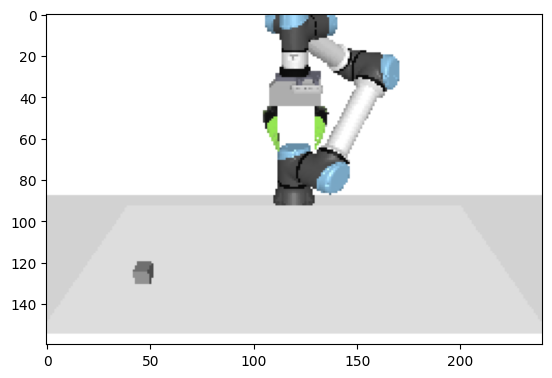

In [3]:
# go to initial position
for _ in range(100):
    action = [-2.30, -2.34, 1.85, -1.06, -1.57, -0.73, 0.054]
    allinfo_tdt = env.step(action)
    
obs = env.get_obs(update_exteroception=True)
plt.imshow(env.visual_dict['rgb:front:160x240:2d'])
env.obs_dict

## Replay trajectory

In [5]:
def save_gif(images, path='tmp.gif', width=300):
    images[0].save(path, format="GIF", append_images=images, save_all=True, duration=100, loop=0)
    
    with open('grasp_fixed.gif','rb') as f:
        return IPyImage(data=f.read(), format='png', width=width)

In [9]:
def replay_trajectory(trajectory, camera_name='rgb:front:160x240:2d'):
    images = []
    diffs = []
    target = []
    current = []
    
    for _ in range(100):
        env.step(trajectory[0])
        
    for action in trajectory:
        env.step(action)
        env.step(action)
        env.step(action)
        env.step(action)
        env.get_obs(update_exteroception=True)
        
        pos = env.obs_dict['qp_robot'][:7]
        diffs.append(abs(action - pos))
        target.append(action)
        current.append(pos)
        
        image = env.visual_dict[camera_name]
        images.append(Image.fromarray(image))
        
    return {
        'images': images,
        'diffs': np.array(diffs),
        'target': np.array(target),
        'current': np.array(current),
    }
        

In [10]:
trajectory = np.loadtxt('grasp_fixed.txt')
trajectory = np.delete(trajectory, 7, axis=1)
trajectory.shape

(24, 7)

In [11]:
result = replay_trajectory(trajectory)
images = result['images']
diffs = result['diffs']
target = result['target']
current = result['current']

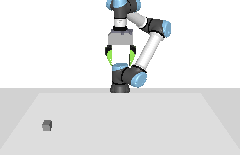

In [12]:
save_gif(images, 'grasp_fixed.gif')

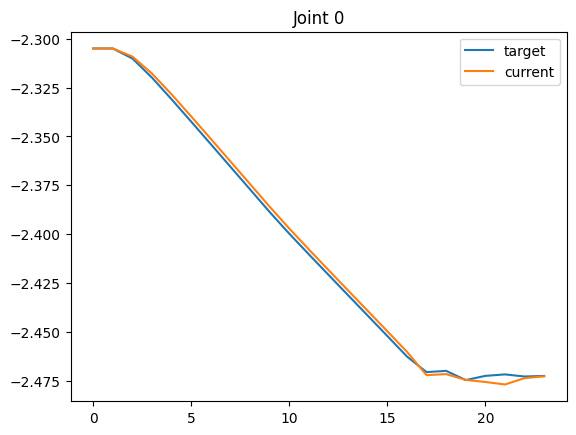

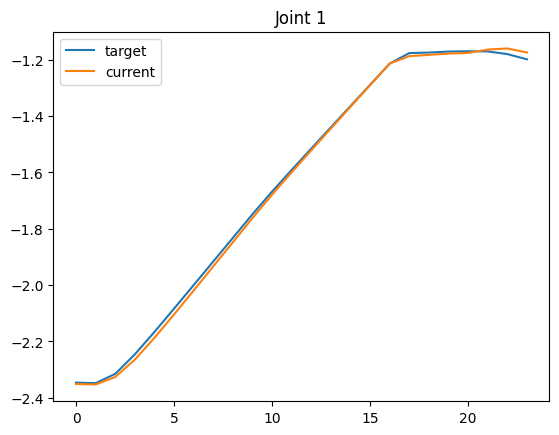

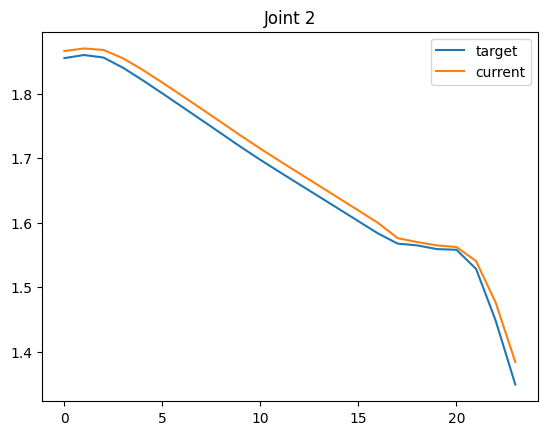

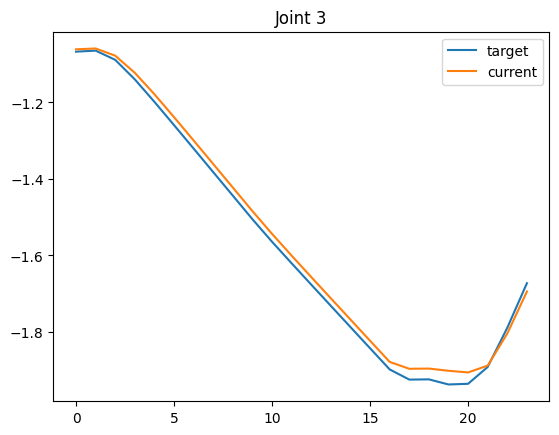

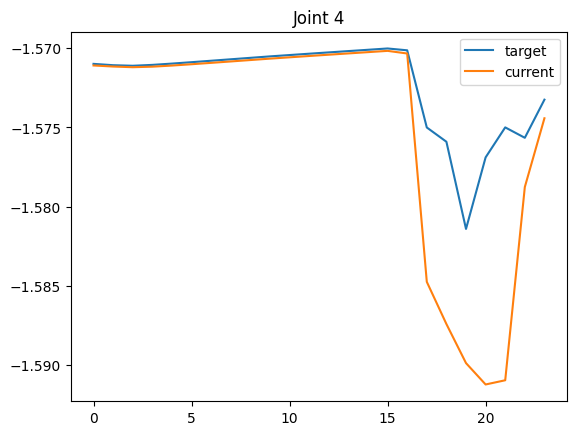

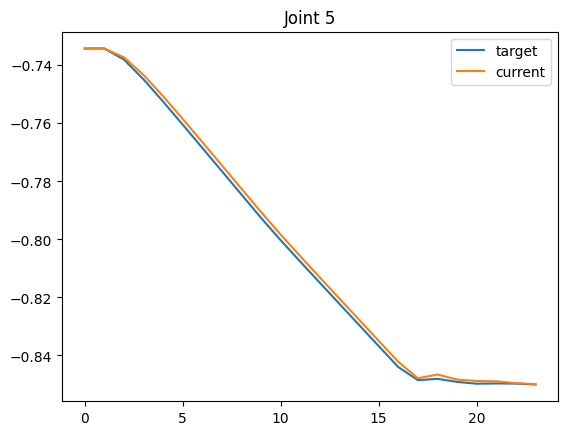

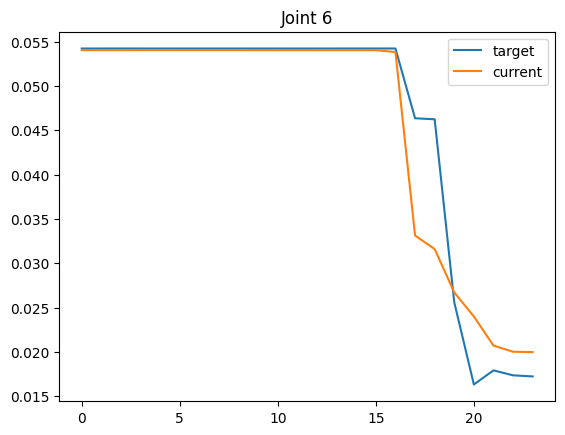

In [13]:
for i in range(7):
    plt.plot(target[:, i], label='target')
    plt.plot(current[:, i], label='current')
    plt.title(f'Joint {i}')
    plt.legend()
    plt.show()

## Cameras

rgb:top_down:160x240:2d


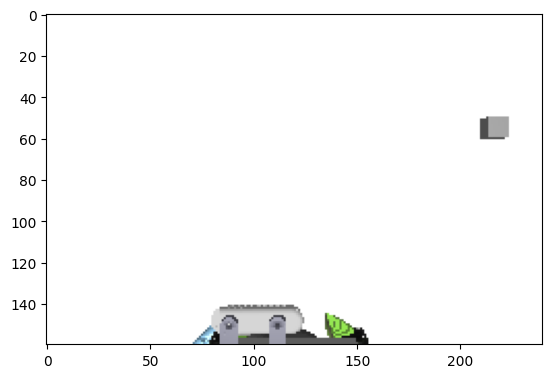

rgb:front:160x240:2d


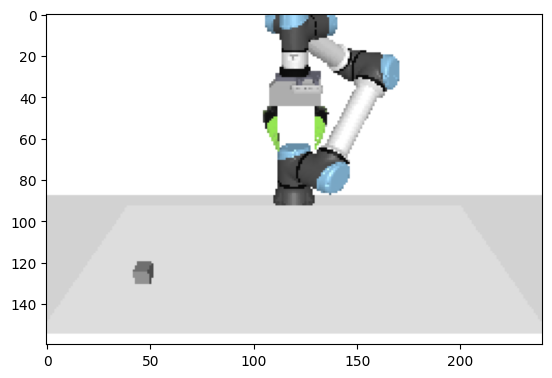

rgb:gripper:160x240:2d


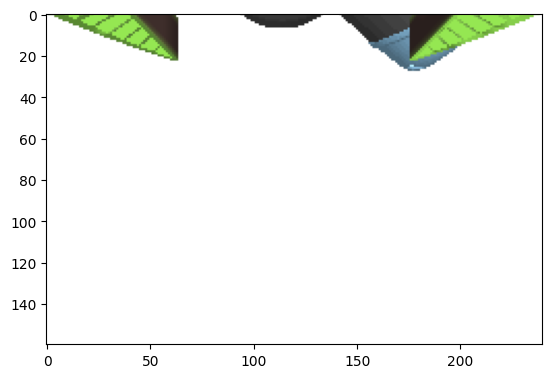

In [4]:
extero_dict = env.get_exteroception()
obs = env.get_obs(update_exteroception=True)
for key in env.visual_dict.keys():
    if key == 'time':
        continue
    print(key)
    plt.imshow(env.visual_dict[key])
    plt.show()